In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [3, 1, 1, 0, 2, 9, 4, 7, 9, 7, 2, 10, 9, 8, 4, 4, 7, 3, 0, 1, 10, 2, 9, 0, 0, 7, 4, 2, 3, 5]
Mean = 4.433333333333334
Variance = 10.97888888888889


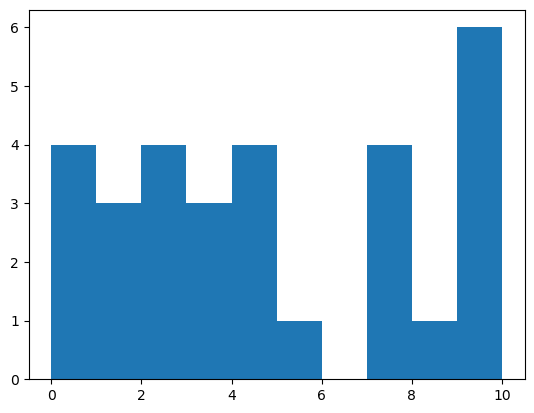

In [4]:
plt.hist(sample)
plt.show()

Analyzing Real Data

In [5]:
df = pd.read_csv("data/SOCR_MLB.tsv",sep='\t',header=None,names=['Name','Team','Role','Weight','Height','Age'])
df

,Name,Team,Role,Weight,Height,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [6]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.689255
Weight     73.697292
dtype: float64

In [7]:
print(list(df['Height'])[:20])

[180.0, 215.0, 210.0, 210.0, 188.0, 176.0, 209.0, 200.0, 231.0, 180.0, 188.0, 180.0, 185.0, 160.0, 180.0, 185.0, 197.0, 189.0, 185.0, 219.0]


In [8]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.6892545982575
Variance = 440.6426848120547
Standard Deviation = 20.991490771549664


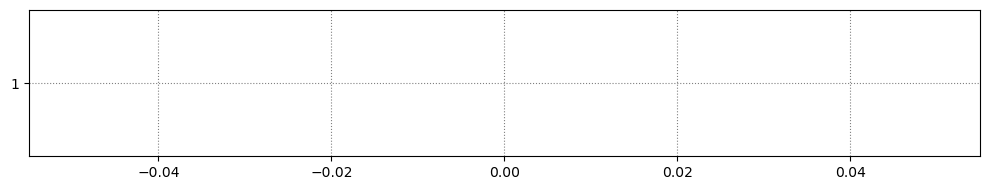

In [9]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

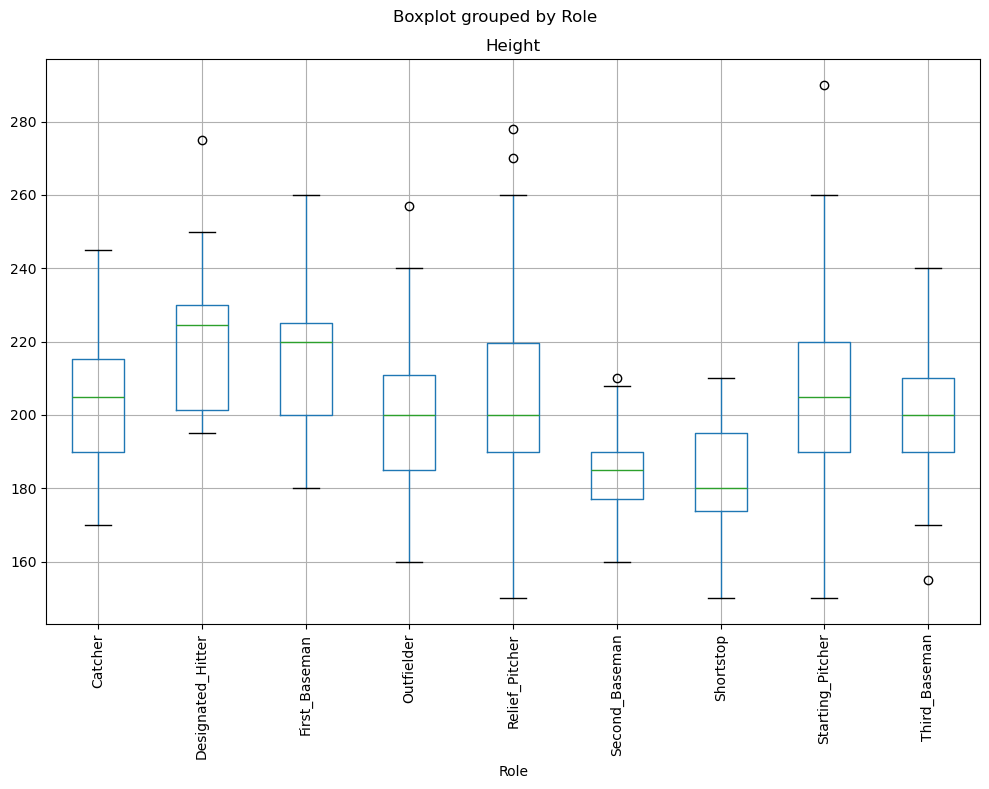

In [10]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

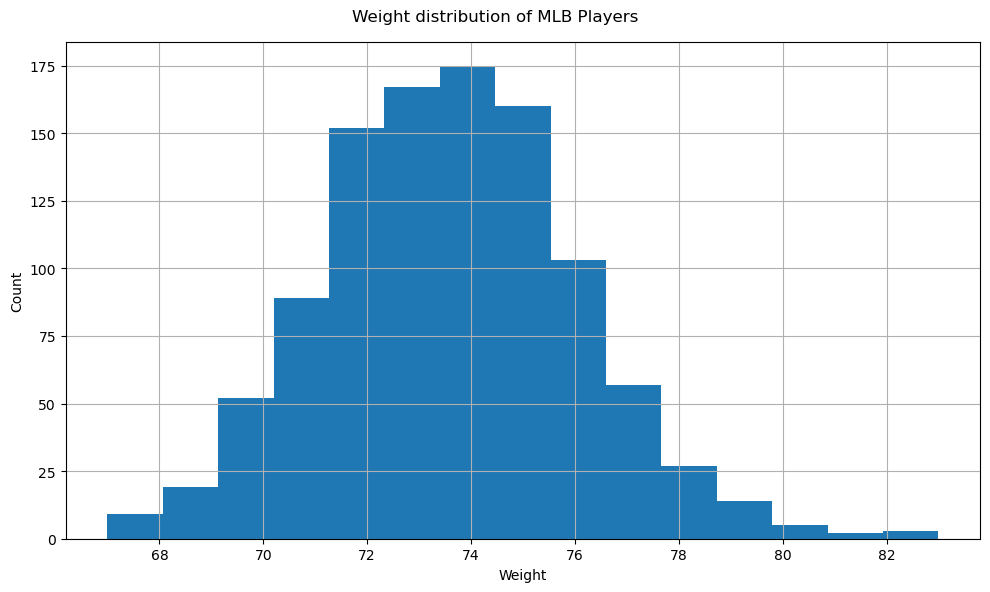

In [11]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [12]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([218.92956287, 215.23324668, 191.73573614, 215.47849579,
       188.45185114, 173.61595738, 181.67534729, 214.64010342,
       237.16532504, 203.3832999 , 163.23912709, 201.70636663,
       216.3285471 , 197.67240129, 197.05894435, 208.7213247 ,
       206.26358872, 202.67523109, 189.45128606, 220.68727614])

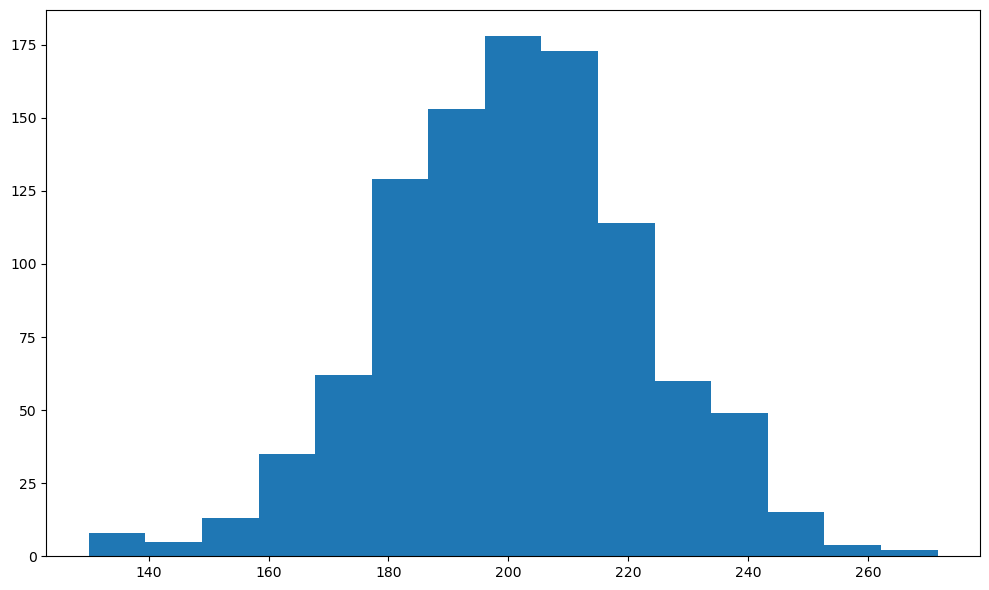

In [13]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

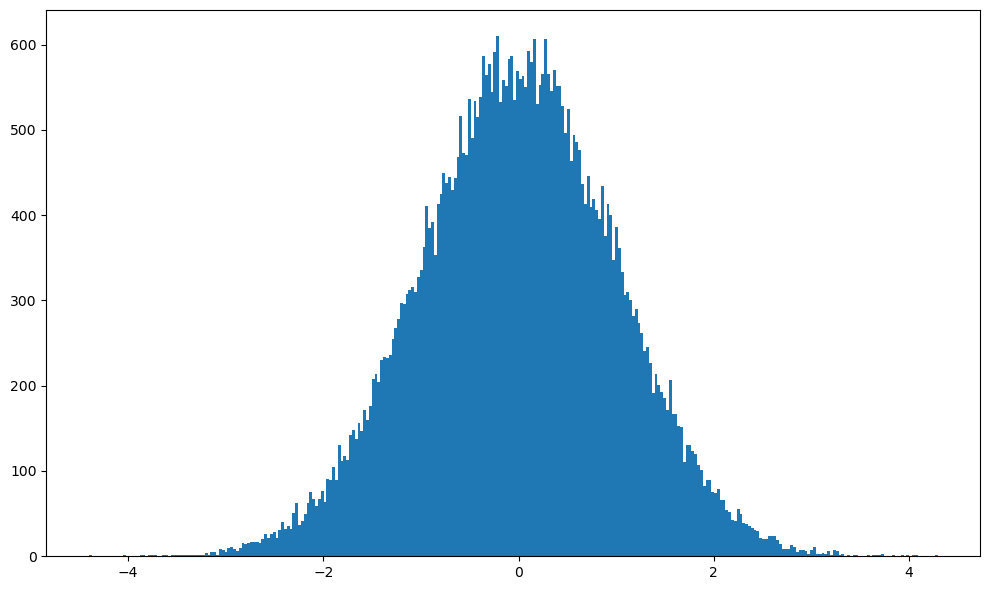

In [14]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

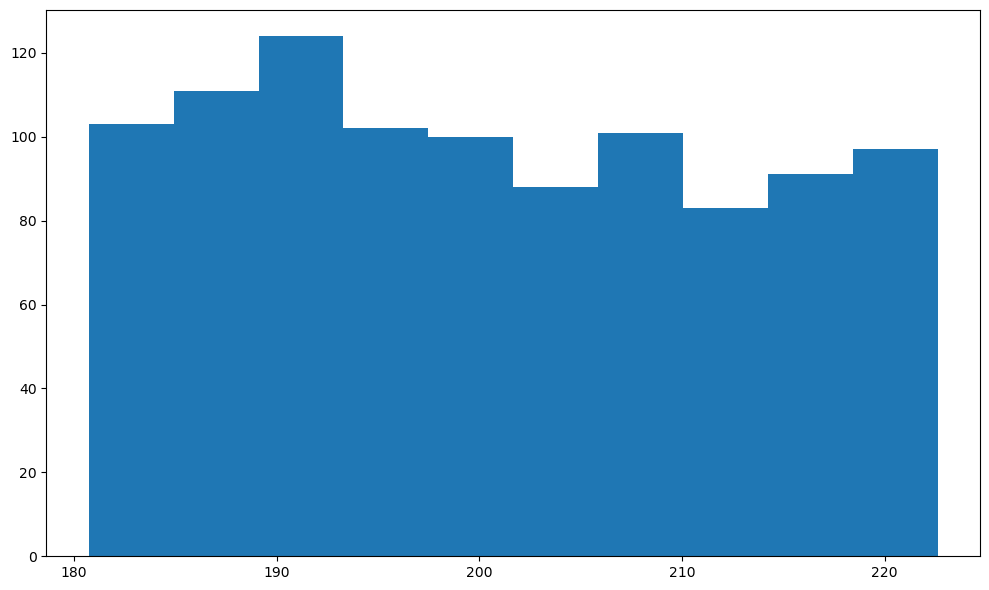

In [15]:
wrong = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong)
plt.tight_layout()
plt.show()

In [16]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85,0.9,0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f}  ± {h:.2f}")

p=0.85, mean = 73.70  ± 0.10
p=0.90, mean = 73.70  ± 0.12
p=0.95, mean = 73.70  ± 0.14


C:\Users\Sakshan Sharma\AppData\Local\Temp\ipykernel_4804\3827638788.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)


In [17]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Weight,Height,Count
Role,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


In [18]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role'] == 'First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role'] == 'Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97, 2nd basemen height: 181.45..187.24


In [19]:
from scipy.stats import ttest_ind
tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


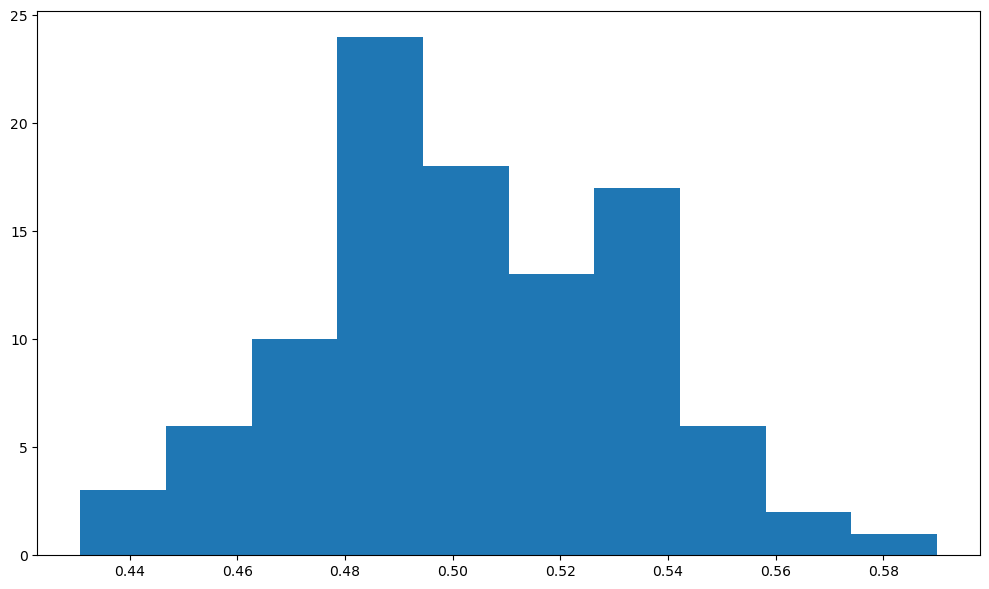

In [20]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size)]
    return sum(sample)/sample_size
sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

In [21]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180.0, 1033.9709509454644), (215.0, 1073.6037270485065), (210.0, 1067.941901890929), (210.0, 1067.941901890929), (188.0, 1043.0298711975884), (176.0, 1029.4414908194026), (209.0, 1066.8095368594136), (200.0, 1056.6182515757741), (231.0, 1091.721567552754), (180.0, 1033.9709509454644)]


In [22]:
print(f"Covariance matrix;\n{np.cov(heights, salaries)}")
print(f"Covariance - {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix;
[[nan nan]
 [nan nan]]
Covariance - nan
Correlation = nan


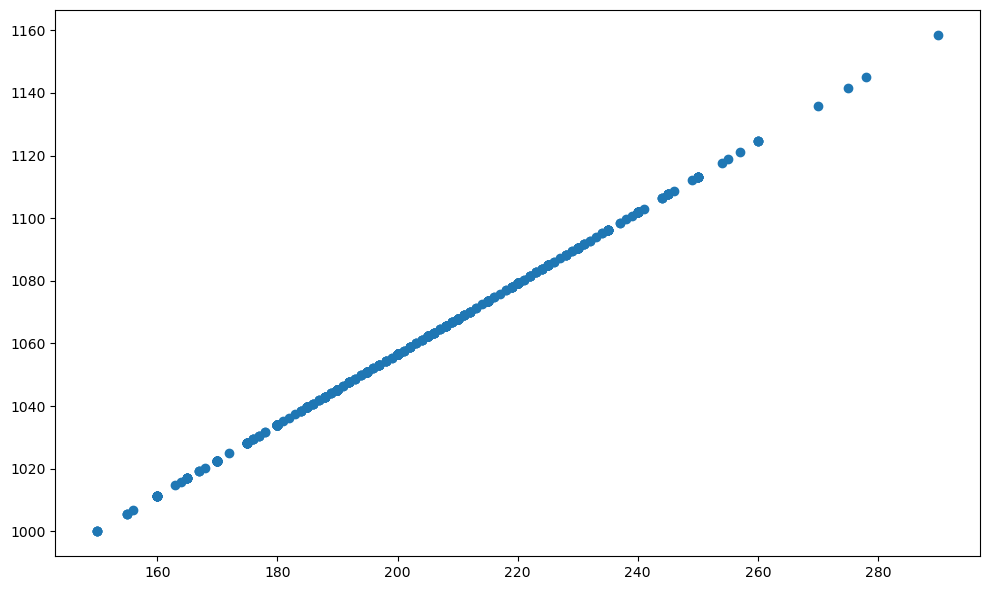

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [25]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = nan


In [26]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = nan


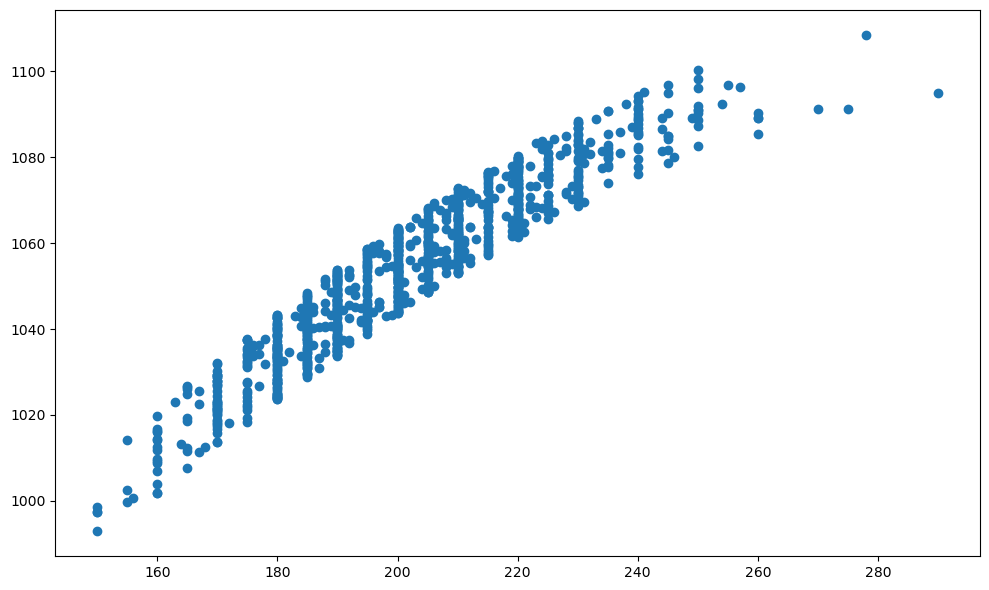

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

In [29]:
np.corrcoef(df['Height'],df['Weight'])

array([[nan, nan],
       [nan,  1.]])

In [30]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

C:\Users\Sakshan Sharma\AppData\Local\Temp\ipykernel_4804\855663990.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))


array([[nan, nan],
       [nan,  1.]])

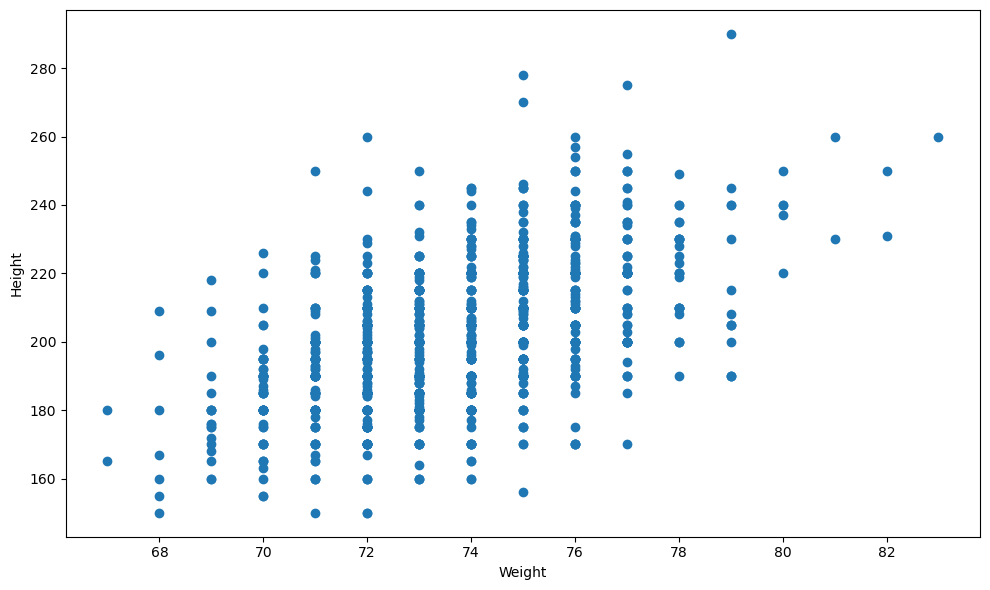

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()
